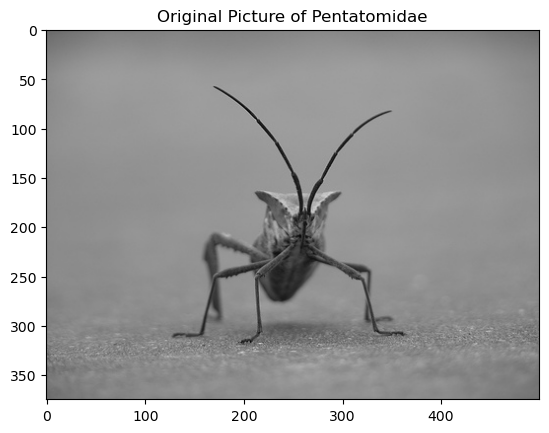

In [2]:
# Laster inn bildet image001.png
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.colors
from PIL import Image
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["black","white"])
img = mpimg.imread('image001.png')
plt.title("Original Picture of Pentatomidae")
plt.imshow(img)
plt.show()


In [ ]:
# Oppgave 1

#Defining variables and constants
Sx = 500
Sy = 375

fx = np.zeros((Sy,Sx))
fy = np.zeros((Sy,Sx))
fgradabs = np.zeros((Sy,Sx))
edge_detection = np.zeros((Sy,Sx))
image = img[:,:,-1]

image = image.astype(np.float64)

#Defining a arbitrary smooth functions
def f(x,y):
    return image[y,x]
    

#Partial derivative numerical function on x
def f_x(x,y, Dx):
    return (f(x + Dx, y) -  f(x-Dx, y)) /2*Dx
    
#Partial derivative numerical function on y
def f_y(x,y,Dy):
    return (f(x , y + Dy) -  f(x, y-Dy)) /2*Dy

for i in range(1,Sy-1):
    for j in range(1,Sx-1):
       fx[i,j]= f_x(j,i,1)
       fy[i,j] = f_y(j, i, 1)

#Task A
plt.imshow(fx, cmap=cmap, interpolation='none')
plt.title("(1A) Bug after partial derivative-X")
plt.show()

#Task B
plt.imshow(fy, cmap=cmap, interpolation='none')
plt.title("(1B) Bug after partial derivative-Y ")
plt.show()

#Task C
#Finding the lenght of the gradient.
def nablaf_x(a,b):
     return np.sqrt(a**2 + b**2)

for k in range(1, Sy-1):
    for h in range(1, Sx-1):
        fgradabs[k,h] = nablaf_x(fx[k,h], fy[k,h])
        
plt.imshow(fgradabs, cmap="Greys", interpolation='none')
plt.title("(1C) Bug after fgradabs (Length of gradient)")
plt.show();

#Task D
max=np.max(fgradabs)
for k in range(1, Sy):
    for h in range(1, Sx):
        fgradabs[k,h] = fgradabs[k,h]/max
        
plt.imshow(fgradabs, cmap="Greys", interpolation='none')
plt.title("(1D) Bug after length of gradient, now between 0 and 1")
plt.show();

#Task F
def kutt(x,c):
    value = 0.0
    if x <= c: value = 1.0
    return value

#Task F/G
image = img[:,:,-1]
image = image.astype(np.float64)
for k in range(1, Sy):
    for h in range(1, Sx):
        fgradabs[k,h] = kutt(fgradabs[k,h],0.1)
plt.imshow(fgradabs, cmap="Greys", interpolation='none')
plt.title("(1F/G) Bug after Edge Detection")
plt.show()

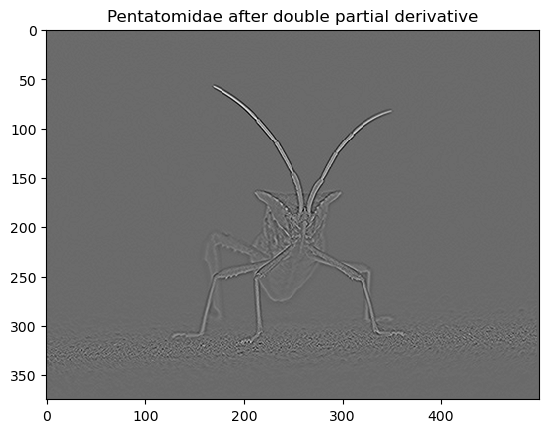

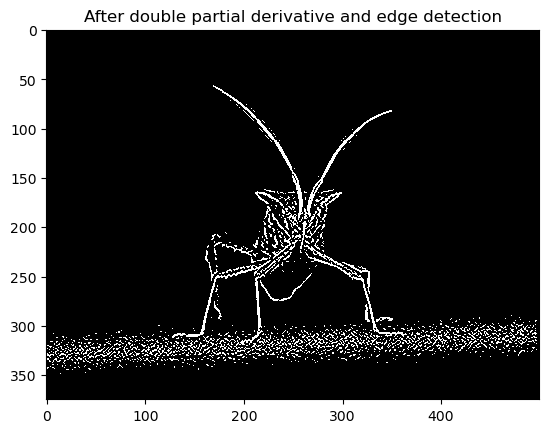

In [18]:
#Oppgave 3
#Sets the values for the delta of x, y and t
Dx = 1
Dy = 1
Dt=0.5
function = np.zeros((Sy,Sx))
Fxx = np.zeros((Sy,Sx))
Fyy = np.zeros((Sy,Sx))
image=img[:,:,-1]
image = image.astype(np.float64)

#Function
def F(x,y,t):
    return image[y,x]
#Partial derivative numerical function on x
def F_x( x, y, t):
    return (F(x + Dx, y, t) -  F(x-Dx, y, t)) /2*Dx
#Partial derivative numerical function on y
def F_y( x, y, t):
    return (F(x , y + Dy,t) -  F(x, y-Dy,t)) /2*Dy

#Second order partial derivative on xx
def F_xx(x,y,t):
    return (F_x(x+ Dx ,y,t) - F_x(x- Dx, y,t))/2*Dx
#Second order partial derivative on yy
def F_yy(x,y,t):
    return (F_y(x ,y+ Dy,t) - F_y(x, y- Dy,t))/2*Dy


update=10
for o in range(update):
    for i in range(Sy-2):
         for j in range(Sx-2):
            Fxx[i,j] = F_xx(j,i,0)
            Fyy[i,j] = F_yy(j,i,0)
    function = Dt*(Fxx + Fyy)
plt.imshow(function, cmap=cmap, interpolation='none')
plt.title("Pentatomidae after double partial derivative")
plt.show()


max=np.max(function)
for i in range(Sy):
    for j in range(Sx):
        function[i,j] = (function[i,j]/ max)
        function[i,j] = kutt(function[i,j],0.05)

plt.imshow(function, cmap="Greys", interpolation='none')
plt.title("After double partial derivative and edge detection")
plt.show()

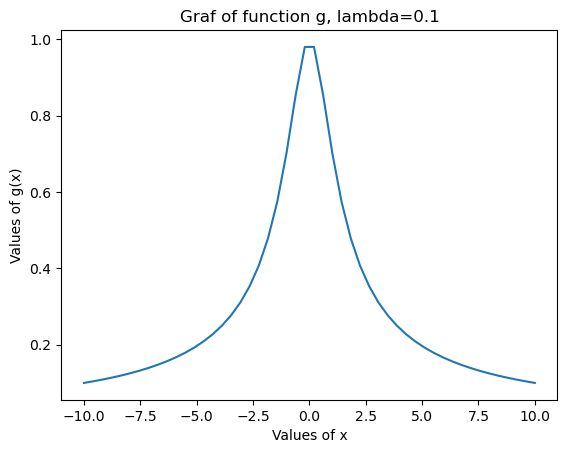

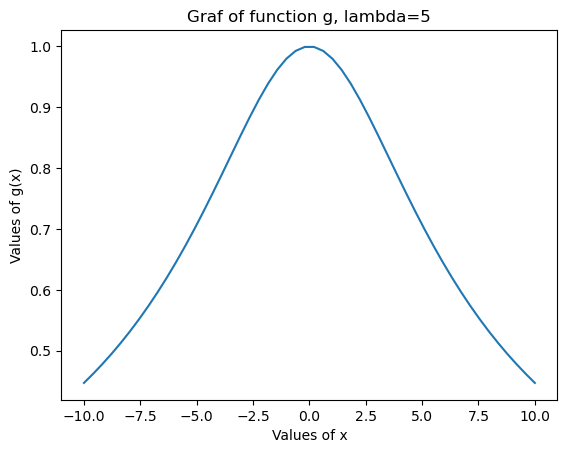

<function matplotlib.pyplot.show(close=None, block=None)>

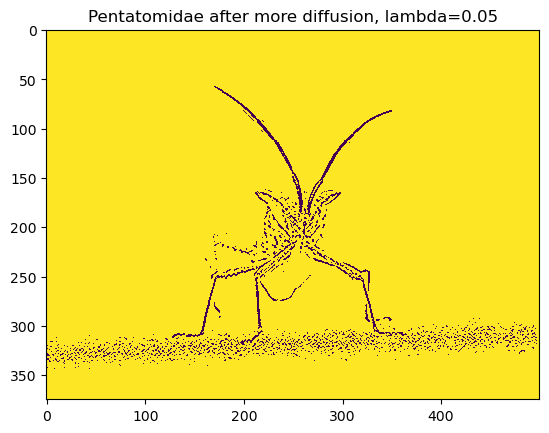

In [19]:
# Oppgave 4
nablaF = np.zeros((Sy,Sx))
Gf = np.zeros((Sy,Sx))
GX=np.linspace(-10,10)
fuction = np.zeros((Sy,Sx))

def g(x, lam):
     under=(np.sqrt(1+ (((x)**2)/(lam**2))))
     return 1/under

for i in range(Sy):
    for j in range(Sx):
        nablaF[i,j] =nablaf_x(Fxx[i,j], Fyy[i,j])
        Gf[i,j] = g(nablaF[i,j], 0.05)
        function[i,j] = Gf[i,j] * (Fxx[i,j]+ Fyy[i,j])

max=np.max(function)

for i in range(Sy):
    for j in range(Sx):
        function[i,j] = function[i,j]/max
        function[i,j] = kutt(function[i,j],0.5)
        
#Task A -Graph for function g
plt.plot(GX,g(GX,1.0))
plt.xlabel("Values of x")
plt.ylabel("Values of g(x)")
plt.title("Graf of function g, lambda=0.1")
plt.show()

plt.plot(GX,g(GX,5))
plt.xlabel("Values of x")
plt.ylabel("Values of g(x)")
plt.title("Graf of function g, lambda=5")
plt.show()

"""
With values where nambla f is closer to zero, g(nambla f) starts to increase. 
With large values of nambla f, the output will be decrese og g(x).
When abs(lambda) is higher, the output for g(nambla f) be have an overall increse
and the graph gets more rounded. However the graph increses when nambla f is close to zero.
Since nabla is myltiplied by itself, the value from g(x) is symetrical on both sides of x=0.
"""

plt.imshow(function, interpolation='none')
plt.title("Pentatomidae after more diffusion, lambda=0.05")
plt.show
